In [22]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as cumfreq

vendasDiarias = {'Vendas por Dia': [12, 15, 14, 10, 12, 16, 18, 17, 14, 19, 20, 22, 21, 15, 14, 13, 16, 15, 12, 10, 9, 11, 13, 17, 18, 19, 20, 21, 22, 23]}

categorias = ['TVs', 'Laptops', 'Celulares', 'Tablets']
numVendas = [60, 80, 200, 50]
precoMedio = [2000, 3500, 1200, 1800]
dtPorCategoria = pd.DataFrame({
  'Categorias': categorias,
  'Número de Vendas': numVendas,
  'Preço Médio': precoMedio
})
display(dtPorCategoria)

dt = pd.DataFrame(vendasDiarias)
display(dt)

# vc = pd.DataFrame(vendasPorCategoria)
# display(vc)


,Categorias,Número de Vendas,Preço Médio
0,TVs,60,2000
1,Laptops,80,3500
2,Celulares,200,1200
3,Tablets,50,1800


,Vendas por Dia
0,12
1,15
2,14
3,10
4,12
5,16
6,18
7,17
8,14
9,19


In [27]:
n_classes = 5

n_max = dt['Vendas por Dia'].max()
n_min = dt['Vendas por Dia'].min()

amplitude = round((n_max-n_min)/n_classes)

classes = np.arange(n_min, n_max+2, amplitude)

tabela_frequencia = dt['Vendas por Dia'].value_counts(bins = n_classes).sort_index()
tabela_frequencia = tabela_frequencia.reset_index()
tabela_frequencia.columns = ['Classe', 'Frequência']

tabela_frequencia['Classe'] = tabela_frequencia["Frequência"].index
tabela_frequencia["Pontos Médios"] = (classes[:-1] + classes[1:]) / 2
tabela_frequencia['Frequência Relativa'] = tabela_frequencia['Frequência'].values/len(dt['Vendas por Dia'])
tabela_frequencia['Frenquência Acumulativa'] = tabela_frequencia['Frequência'].values.cumsum()

display(tabela_frequencia)

,Classe,Frequência,Pontos Médios,Frequência Relativa,Frenquência Acumulativa
0,0,4,10.5,0.133333,4
1,1,8,13.5,0.266667,12
2,2,7,16.5,0.233333,19
3,3,6,19.5,0.200000,25
4,4,5,22.5,0.166667,30


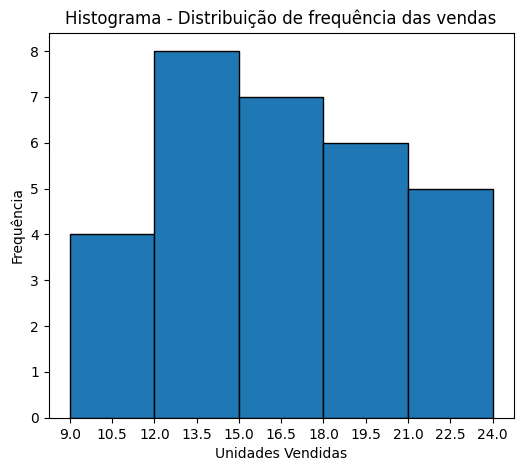

In [28]:
plt.figure(figsize=(6, 5))
plt.hist(x=tabela_frequencia['Pontos Médios'], bins=classes, weights=tabela_frequencia['Frequência'], edgecolor= 'black')
plt.title('Histograma - Distribuição de frequência das vendas')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência')

plt.xticks(np.concatenate([classes, tabela_frequencia['Pontos Médios']]))

plt.show()

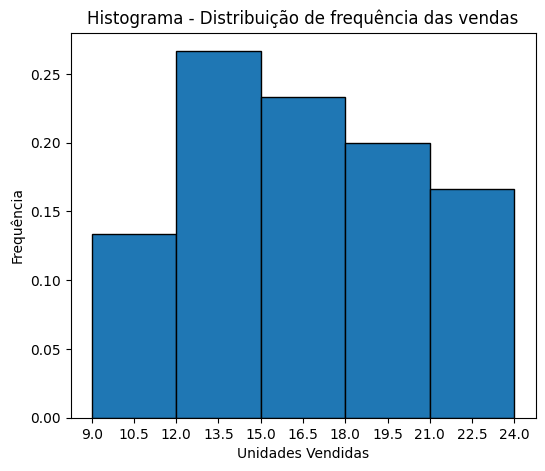

In [39]:
plt.figure(figsize=(6,5))
plt.hist(x=tabela_frequencia['Pontos Médios'], bins=classes, weights=tabela_frequencia['Frequência Relativa'], edgecolor='black')


plt.title('Histograma - Distribuição de frequência das vendas')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência')

plt.xticks(np.concatenate([classes, tabela_frequencia['Pontos Médios']]))

plt.show()



Ponto médio fictício à esquerda: 7.5
Ponto médio fictício à direita: 13.5


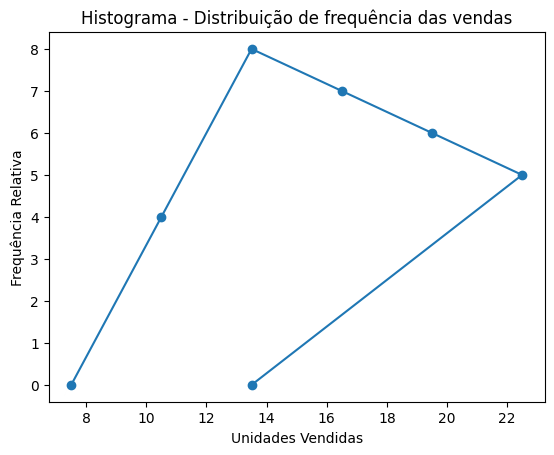

In [40]:
fic_esq = [tabela_frequencia['Pontos Médios'].iloc[0] - amplitude]
print(f'Ponto médio fictício à esquerda: {fic_esq[0]}')
fic_dir = [tabela_frequencia['Pontos Médios'].iloc[0] + amplitude]
print(f'Ponto médio fictício à direita: {fic_dir[0]}')

x_data = np.concatenate([fic_esq, tabela_frequencia['Pontos Médios'], fic_dir])
y_data = np.concatenate([[0], tabela_frequencia['Frequência'], [0]])
plt.plot(x_data, y_data, marker='o')

plt.title('Histograma - Distribuição de frequência das vendas')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência Relativa')


plt.show()

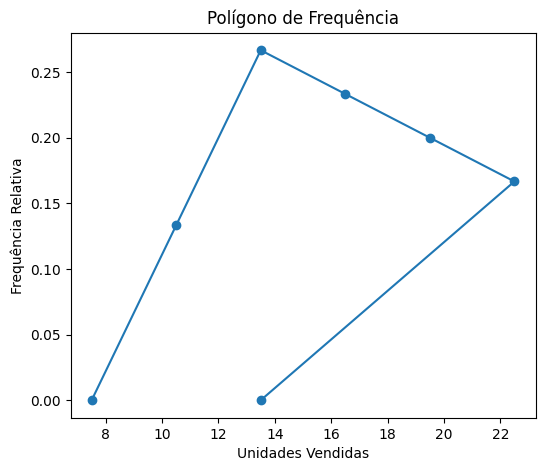

In [35]:
y_data = np.concatenate([[0], tabela_frequencia['Frequência Relativa'], [0]])

plt.figure(figsize=(6,5))
plt.plot(x_data, y_data, marker='o')
plt.title('Polígono de Frequência')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência Relativa')
plt.show()

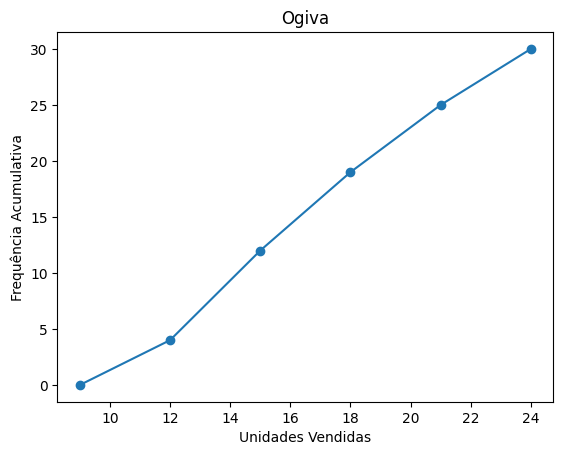

In [38]:
ini_ogiva = [classes[1] - amplitude]

x_data = ini_ogiva + [limite for limite in classes[1:]]
y_data = np.concatenate([[0], tabela_frequencia['Frenquência Acumulativa']])

plt.plot(x_data, y_data, marker='o')

plt.title('Ogiva')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência Acumulativa')
plt.show()